Este notebook esta dedicado al entrenamiento de los modelos de filtrado y a las pruebas de rendimiento de estos mismos sumado a las pruebas de rendimiento de los modelos de dicados a la limpieza

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


2024-06-18 04:47:51.419664: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 04:47:51.419727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 04:47:51.506842: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 04:47:51.641941: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 04:47:52.788747: W tensorflow/compiler/tf2

TensorFlow version: 2.15.0


In [2]:

from tensorflow import keras as kr
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
def contar_letras(sequence,largo):
    possible_letters = ['A', 'C', 'G', 'T', 'M', 'R', 'W', 'S', 'Y', 'K', 'V', 'H', 'D', 'B', 'N']

    letter_counts=[]
    for letter in possible_letters:
        letter_counts.append(sequence.count(letter))
    letter_counts.append(largo)
    return letter_counts

possible_letters = ['A', 'C', 'G', 'T', 'M', 'R', 'W', 'S', 'Y', 'K', 'V', 'H', 'D', 'B', 'N']

In [ ]:
aux=100

In [ ]:
historias=[]
total=[]
for i in range(0,3):
    a=[]
    b=[]
    for j in range(1, aux + 1):
        iteracion=((i*100)+j)
        print("Iteración:", iteracion)
        print("Cargando datos")
        try:
            atr = np.load(f"caracteristicas4/atributos_{iteracion}.npy")
            res = np.load(f"caracteristicas4/resultados_{iteracion}.npy")
            a.append(atr)
            b.append(res)

            #if(i>15):
            #break

        except Exception as e:
            print(f"Ocurrió un error en la iteración {i}: {e}")
            pass
        
    a = np.concatenate(a, axis=0)

    b = np.concatenate(b, axis=0)
    
    
    #columns_to_extract = [6,7,8,15,16,17]
    columns_to_extract = [6,7,8,9,10,11,18,19,20,21,22,23]
    reduced_a=a[:, columns_to_extract]
    
    #print(a.shape)
    #print(b.shape)
    total.append(len(reduced_a))
    
    
    X_train, X_test, y_train, y_test = train_test_split(reduced_a, b, test_size=0.2, random_state=42)
    #print(X_test.shape)
    break
    #print(y_train.shape)
    #X_trains = scaler.fit_transform(X_train)
    #X_tests = scaler.fit_transform(X_test)
    #rf_regressor.fit(X_train, y_train)
    
    #rl_model.fit(X_train, y_train)
    
    
    #knn.fit(X_train,y_train)
    #total.append(len(reduced_a))
"""
    historia=modelo.fit(
        x=reduced_a,
        y=b,
        batch_size=500,
        epochs=100,
        validation_split=0.2
    )
    historias.append(historia)
"""

    #x_labels=['A_fr', 'C_fr', 'G_fr', 'T_fr', 'M_fr', 'R_fr', 'W_fr', 'S_fr', 'Y_fr', 'K_fr', 'V_fr', 'H_fr', 'D_fr', 'B_fr', 'N_fr','Largo_fr','q1','A_rv', 'C_rv', 'G_rv', 'T_rv', 'M_rv', 'R_rv', 'W_rv', 'S_rv', 'Y_rv', 'K_rv', 'V_rv', 'H_rv', 'D_rv', 'B_rv', 'N_rv','largo_rv','q2']

In [ ]:
print(a[0])
print(a.shape)

In [ ]:
p=0
for l in total:
    p=p+l
    print(p)

In [ ]:
aux2=0
for num in total:
  aux2+=num

print(aux2)

In [ ]:
b_reshaped = b.reshape(-1, 1)

# Concatenación horizontal de a y b
c = np.hstack((a, b_reshaped))


In [ ]:

columns_to_extract1 = [0,1,2,3,4,5,6,7,8,9,10,11,24]
reduced_c=c[:, columns_to_extract1]
column_names = [
    'Num_A_fr', 'Num_C_fr', 'Num_G_fr', 'Num_T_fr', 'Num_N_fr', 'Largo_fr', 'good_qual_fr', 'bad_qual_fr',
    'Prom_qual_fr','Mediana_qual_fr','Std_qual_fr','Var_qual_fr','existe'
]
df = pd.DataFrame(reduced_c, columns=column_names)

In [ ]:
columns_to_extract2 = [12,13,14,15,16,17,18,19,20,21,22,23,24]
reduced_c2=c[:, columns_to_extract2]

column_names2 = [
    'Num_A_rv', 'Num_C_rv', 'Num_G_rv', 'Num_T_rv', 'Num_N_rv', 'largo_rv', 'good_qual_rv',
    'bad_qual_rv', 'Prom_qual_rv','Mediana_qual_rv','Std_qual_rv','Var_qual_rv', 'existe'
]
dk = pd.DataFrame(reduced_c2, columns=column_names2)

In [ ]:
#df_seqs=pd.DataFrame(data2)
corr_matrix=df.corr()

In [ ]:
corr_matrix=dk.corr()

In [ ]:
print(corr_matrix)

In [ ]:

%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 10)

In [ ]:
sbn.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:

columns_to_extract = [6,7,8,9,10,11,18,19,20,21,22,23,24]
reduced_a=c[:, columns_to_extract]
print(reduced_a.shape)

In [ ]:
column_names2 = [
   'good_qual_fr', 'bad_qual_fr',
    'Prom_qual_fr','Mediana_qual_fr','Std_qual_fr','Var_qual_fr', 'good_qual_rv',
    'bad_qual_rv', 'Prom_qual_rv','Mediana_qual_rv','Std_qual_rv','Var_qual_rv', 'existe'
]
df_2 = pd.DataFrame(reduced_a, columns=column_names2)

In [ ]:
#df_seqs_red=pd.DataFrame(data2)
corr_matrix_red=df_2.corr()

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 10)

In [ ]:
sbn.heatmap(corr_matrix_red,annot=True)
plt.show()

(461412, 34)
(461412,)
(461412, 34)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,GlobalAveragePooling1D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense

def modelo_cnn():
    model = Sequential()

    # Capa convolucional
    model.add(Conv1D(64, 3, activation='relu', input_shape=(10, 1)))

    # Capa de reducción
    model.add(MaxPooling1D(2))

    # Capa de reducción global
    model.add(GlobalAveragePooling1D())

    # Capa densa
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Capa de salida para clasificación binaria
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse', 'mae'])
    model.summary()
    return model


In [ ]:
import tensorflow as tf

import tensorflow as tf

def binary_output_rnn_model():
    # Definir el modelo RNN
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=( 18,1)),
        tf.keras.layers.LSTM(32, return_sequences=False),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.001)),
        tf.keras.layers.Dense(16, activation='softmax'),
        tf.keras.layers.Dense(8, activation='tanh'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida binaria
    ])

    # Compilar el modelo
    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.BinaryCrossentropy()
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy','mse','mae'])
    model.summary()
    return model

# Crear una instancia del modelo

# Entrenar el modelo con tus datos
# binary_rnn_model.fit(x_train, y_train_binary, epochs=10, batch_size=32, validation_data=(x_val, y_val_binary))


# Entrenar el modelo con tus datos
# binary_rnn_model.fit(x_train, y_train_binary, epochs=10, batch_size=32, validation_data=(x_val, y_val_binary))


In [10]:
def model_cnn_binary():
    input_1 = tf.keras.Input(shape=(12,))

    # Reshape to match Conv1D expectations
    x = tf.keras.layers.Reshape((12, 1))(input_1)

    # Convolutions for spatial processing
    x = tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)

    # Additional convolutional layer to adjust dimensions before LSTM
    x = tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling1D(2)(x)

    # LSTM Layer
    x = tf.keras.layers.LSTM(64, return_sequences=True)(x)

    # Additional dimension reduction with Dense layers and regularization
    x = tf.keras.layers.Dense(32, activation='relu')(x)


    # Additional layers with different activation functions
    x = tf.keras.layers.Dense(16, activation='softmax')(x)
    x = tf.keras.layers.Dense(8, activation='tanh')(x)

    # Flatten and output layer for binary classification
    x = tf.keras.layers.Flatten()(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    optimizer = tf.keras.optimizers.Adam()
    loss = tf.keras.losses.BinaryCrossentropy()

    model = tf.keras.Model(inputs=input_1, outputs=outputs)
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy', 'mse', 'mae'])
    model.summary()
    return model


In [ ]:
print(tf.config.list_physical_devices('GPU'))
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)


In [11]:
#modelo = modelo_cnn()
#modelo=binary_output_rnn_model()
modelo=model_cnn_binary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 reshape (Reshape)           (None, 12, 1)             0         
                                                                 
 conv1d (Conv1D)             (None, 12, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 6, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                        

In [ ]:
historia=modelo.fit(
        x=reduced_a,
        y=b,
        batch_size=300,
        epochs=1000,
        validation_split=0.2
    )

In [ ]:
print(len(a))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_a, b, test_size=0.2, random_state=42)

In [ ]:


X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
print(len(X_train))
print(len(X_test))

k-vecino


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=33)
#knn.fit(X_train,y_train)



In [ ]:
from joblib import dump, load
dump(knn, 'knn_200_222.joblib')

In [ ]:
import time

In [ ]:
data={
    'KNN':[0.89534,0.89468,0.89496,0.89511,0.89608],
    'RLog':[0.89401,0.89475,0.89359,0.89435,0.89582],
    'RFC':[0.88720,0.88588,0.88498,0.88835,0.88654],
    'CNN':[0.89450,0.89602,0.89602,0.89503,0.8902]
}

In [ ]:
data={
    'KNN':[0.89572,0.89798,0.89648,0.89587,0.89530],
    'RLog':[0.89542,0.89530,0.89432,0.89504,0.89456],
    'RFC':[0.89610,0.89755,0.89712,0.8979,0.89475],
    'CNN':[0.897262,0.90059,0.89693,0.90066,0.89851]
}

In [ ]:
data_graph=pd.DataFrame(data)

In [ ]:
#data_graph *= 100

# Obtener los nombres de las pruebas (índice + 1)
nombres_pruebas = ['Pliegue ' + str(i + 1) for i in range(len(data_graph))]

# Crear el gráfico de barras
data_graph.plot(kind='bar', figsize=(10, 6))
plt.xticks(range(len(data_graph)), nombres_pruebas, rotation=0)
plt.xlabel('Pliegues')
plt.ylabel('Precisión (%)')
plt.title('Resultados de Pruebas por Algoritmo \ Modelo')
plt.legend(title='Algoritmos y Modelos')

    
plt.ylim(89, data_graph.max().max()+0.5) 

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
start_time = time.time()
y_pred = knn.predict(X_tests)
end_time = time.time()
elapsed_time = end_time - start_time
print("Tiempo transcurrido:", elapsed_time, "segundos")


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print(f'Precisión: {precision}')

Exactitud: 0.9011867020078651
Precisión: 0.915965795947054

Exactitud: 0.8961860670956232
Precisión: 0.9112164027482669

Exactitud: 0.8969397951104489
Precisión: 0.9097515978633403

In [ ]:

scores = cross_val_score(knn, X_test, y_test, cv=5)  # 5-fold cross-validation

# Imprimir los puntajes
print("Puntajes de validación cruzada:", scores)

Puntajes de validación cruzada: [0.89972801 0.90009182 0.89834208 0.89977998 0.89882716]

Puntajes de validación cruzada: [0.89534281 0.89468589 0.89496249 0.89511807 0.89608436]

In [ ]:
std_dev = np.std(scores)
print("Desviación estándar de los puntajes:", std_dev)

Desviación estándar de los puntajes: 0.0006583711477839643

Desviación estándar de los puntajes: 0.00047379921123187006

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(f'Precisión del modelo: {accuracy:.2f}')

# Crear el gráfico
plt.scatter(y_test, y_pred)
plt.xlabel('Etiqueta verdadera')
plt.ylabel('Predicción')
plt.title('Comparación de predicciones con etiquetas verdaderas')
plt.show()


Exactitud: 0.8946335917814202
Precisión: 0.9070840057100298

Exactitud: 0.8995483801647737
Precisión: 0.9090789412548206

Exactitud: 0.7404397342955907
Precisión: 0.7932013769363166
300 vecinos, +400k secuencias


Exactitud: 0.7429111531190926
Precisión: 0.7829011913104414

Exactitud: 0.6887759218913903
Precisión: 0.7602602602602603

Exactitud: 0.6816532576116107
Precisión: 0.7316136114160263


Exactitud: 0.6931021485111195
Precisión: 0.7245370370370371

Exactitud: 0.6986807387862797
Precisión: 0.7375886524822695

In [ ]:
for class_label in np.unique(y_pred):
    # Seleccionar los puntos que pertenecen a esta clase
    X_class = X_test[y_pred == class_label]

    # Graficar los puntos de esta clase con un color específico
    plt.scatter(X_class[:, 0], X_class[:, 1], label=f'Clase {class_label}')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Clasificación KNN')
plt.legend()
plt.show()

svm

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train1, X_test1, X_train2, X_test2, y_train, y_test = train_test_split(X_input1_flat, X_input2_flat, y_output_flat, test_size=0.2, random_state=42)

# Inicializar el regresor RandomForest
rf_regressor = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
#rf_regressor.fit(X_train, y_train)
#rf_regressor.fit([X_train1, X_train2], y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy = accuracy_score(y_test, y_pred)
#print(f'Exactitud: {accuracy}')

# Calcular la precisión
#precision = precision_score(y_test, y_pred)
#print(f'Precisión: {precision}')

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



In [ ]:
print(y_pred)

Mean Squared Error: 0.08575086195409638
R-squared: 0.3708976574757251

Mean Squared Error: 0.071813886088724
R-squared: 0.4731448415250653

Mean Squared Error: 0.07182467345406045
R-squared: 0.473065701133375

Mean Squared Error: 0.07182467345406045
R-squared: 0.473065701133375

Mean Squared Error: 0.084822448994483
R-squared: 0.3907452996439522

Mean Squared Error: 0.08382766269328998
R-squared: 0.3978905570261232

Mean Squared Error: 0.08384832950985813
R-squared: 0.3977421133619188

Mean Squared Error: 0.08383161222244645
R-squared: 0.3978621887199578

Mean Squared Error: 0.07218979630055389
R-squared: 0.4814819280127275

Mean Squared Error: 0.20130679422902553
R-squared: 0.09420774711396429

Mean Squared Error: 0.20187209444424398
R-squared: 0.0828419375011592

Mean Squared Error: 0.20418807310902692
R-squared: 0.07231983680750609


Mean Squared Error: 0.21526467013420308
R-squared: 0.039607327861131636


Mean Squared Error: 0.2196369522782844
R-squared: 0.028014954909463263

Exactitud: 0.7042593290614398
Precisión: 0.7304582210242587
Mean Squared Error: 0.2957406709385601
R-squared: -0.35570131561808016

Mean Squared Error: 0.21148377739688326
R-squared: 0.02409219605763624

Mean Squared Error: 0.21793884920426165
R-squared: -0.01440627993256327


Mean Squared Error: 0.22119389956950966
R-squared: -0.029557059814445008

Mean Squared Error: 0.21692751518356335
R-squared: -0.009698979763494986

cambio de paradigma, dando conteo de letras y largo puro

Mean Squared Error: 0.17795166483968214
R-squared: 0.1788286525842

Mean Squared Error: 0.18141360431683015
R-squared: 0.1591024070537358

Mean Squared Error: 0.18141360431683015
R-squared: 0.1591024070537358


Mean Squared Error: 0.1755127574225682
R-squared: 0.17107820826153897


Mean Squared Error: 0.17888907529190715
R-squared: 0.15513233914734803

regresion logistica


In [ ]:
from sklearn.linear_model import LogisticRegression

rl_model = LogisticRegression()

# Entrenar el modelo
#rl_model.fit(X_train, y_train)


In [ ]:
predictions = rl_model.predict(X_test)
0
# Calcular la precisión
accuracy = accuracy_score(y_test, predictions)
print(f'Exactitud del modelo: {accuracy}')

Exactitud del modelo: 0.893018435655438


Exactitud del modelo: 0.8942661957527632

Exactitud del modelo: 0.7368095965670817

In [ ]:
import time

In [ ]:
start_time = time.time()
y_pred = rl_model.predict(X_tests)
end_time = time.time()
elapsed_time = end_time - start_time
print("Tiempo transcurrido:", elapsed_time, "segundos")

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print(f'Precisión: {precision}')

scores = cross_val_score(rl_model, X_tests, y_test, cv=5)  # 5-fold cross-validation

# Imprimir los puntajes
print("Puntajes de validación cruzada:", scores)
std_dev = np.std(scores)
print("Desviación estándar de los puntajes:", std_dev)

Exactitud: 0.8957957260419432

Precisión: 0.912748935276828

Puntajes de validación cruzada: [0.89517521 0.89666844 0.89675139 0.89451155 0.89502588]

Desviación estándar de los puntajes: 0.00091198067312009

Exactitud: 0.8944884503282866

Precisión: 0.9092473767061563

Puntajes de validación cruzada: [0.89401169 0.89475504 0.89359679 0.89435743 0.89582505]

Desviación estándar de los puntajes: 0.00076091264182547

In [ ]:
print(len(X_test))

In [ ]:
import time

In [ ]:
start_time = time.time()
y_pred = modelo.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print("Tiempo transcurrido:", elapsed_time, "segundos")

In [ ]:
print(y_pred[0])
print(y_test[0])

In [ ]:
y_pred_classes = (y_pred > 0.5).astype("int32")

In [ ]:


# Itera sobre los folds de la validación cruzada
fold_scores = []
for test_index,y in zip(np.array_split(X_test, 5),np.array_split(y_test, 5)):
    accuracy = modelo.evaluate(test_index, y)
    #print(accuracy)
    fold_scores.append(accuracy[1])

# Calcula el promedio de las métricas de cada fold
average_score = sum(fold_scores) / len(fold_scores)
print("Puntuaciones de validación cruzada:", fold_scores)
print("Puntuación promedio:", average_score)

Puntuaciones de validación cruzada: [0.9043189287185669, 0.9039204716682434, 0.9033141136169434, 0.9054449796676636, 0.9036086201667786]
Puntuación promedio: 0.9041214227676392

Puntuaciones de validación cruzada: [0.8944957256317139, 0.8960170149803162, 0.8950316309928894, 0.8958268761634827, 0.8980205655097961]
Puntuación promedio: 0.8958783626556397

In [ ]:
desviacion_estandar = np.std(fold_scores)

print(f"Desviación estándar de los puntajes de los folds: {desviacion_estandar}")


In [ ]:
from tf.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_fn=model, epochs=10, batch_size=32, verbose=0)


In [ ]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(y_test, y_pred_classes)
print(f'Precisión: {precision}')

scores = cross_val_score(model, X_test, y_test, cv=5)  # 5-fold cross-validation

# Imprimir los puntajes
print("Puntajes de validación cruzada:", scores)
std_dev = np.std(scores)
print("Desviación estándar de los puntajes:", std_dev)

In [ ]:
start_time = time.time()
y_pred = rf_regressor.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print("Tiempo transcurrido:", elapsed_time, "segundos")

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print(f'Precisión: {precision}')

scores = cross_val_score(rf_regressor, X_test, y_test, cv=5)  # 5-fold cross-validation

# Imprimir los puntajes
print("Puntajes de validación cruzada:", scores)
std_dev = np.std(scores)
print("Desviación estándar de los puntajes:", std_dev)

In [ ]:
precision = precision_score(y_test,predictions)
print(f'Precisión: {precision}')
accuracy = accuracy_score(y_test,predictions)
print(f'Exactitud: {accuracy}')

Precisión: 0.9081020196587393
Exactitud: 0.893018435655438

Precisión: 0.909550583733552
Exactitud: 0.8942661957527632

Precisión: 0.909550583733552
Exactitud: 0.8942661957527632

Precisión: 0.909550583733552

Precisión: 0.7046818727490997

In [ ]:
print(y_pred.shape)
print(y_pred[0])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

for tree in rf_regressor.estimators_:  # Puedes cambiar el índice para visualizar otro árbol

# Grafica el árbol
    plt.figure(figsize=(20, 10))
    plot_tree(tree, filled=True, feature_names=[f'feature_{i}' for i in range(a.shape[1])], class_names=['0', '1'])
    plt.show()

In [ ]:
atr_prueba = np.load(f"datos_caracteristicas/atributos_149.npy")
res_prueba = np.load(f"datos_caracteristicas/resultados_149.npy")



In [ ]:
print(atr_prueba.shape)
print(res_prueba.shape)

In [ ]:
columns_to_extract = [0,1,2,3,14,15,16,17,18,19,20,21,22,33,34,35,36,37]
atr_prueba=atr_prueba[:, columns_to_extract]

In [ ]:
scaler = StandardScaler()
atr_prueba = scaler.fit_transform(atr_prueba)

In [ ]:
y_pred = rf_regressor.predict(atr_prueba)
print(y_pred.shape)

In [ ]:
mse = mean_squared_error(res_prueba, y_pred)
r2 = r2_score(res_prueba, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


#accuracy = accuracy_score(y_test, y_pred)
#print(f'Exactitud: {accuracy}')

# Calcular la precisión
#precision = precision_score(y_test, y_pred)
#print(f'Precisión: {precision}')


In [ ]:
count=0
count1=0
count2=0
for i,j in zip(y_pred,res_prueba):
    if i>0.62:
        aux=1
    else:
        aux=0
    if aux==j:
        count=count+1
    if aux==1:
        count1=count1+1
    if j==1:
        count2=count2+1
print(f'similitudes {count}')
print(f'elementos pre {count1}')
print(f'elementos og {count2}')

print(f"totales: {len(res_prueba)}")
print(f"delta el {count2-count1}")

similitudes 7155
elementos pre 283
elementos og 31546
totales: 38760
delta el 31263

similitudes 6487
elementos pre 2727
elementos og 3100
totales: 9604
delta el 373



similitudes 6576
elementos pre 2500
elementos og 3100
totales: 9604
delta el 600


similitudes 3927
elementos pre 7803
elementos og 3100
totales: 9604
delta el -4703

similitudes 6447
elementos pre 2369
elementos og 3100
totales: 9604
delta el 731

similitudes 9999
elementos pre 3027
elementos og 5176
totales: 14764
delta el 2149

similitudes 9417
elementos pre 1493
elementos og 5176
totales: 14764
delta el 3683

cambio de paragdigma

similitudes 4718
elementos pre 1459
elementos og 1620
4987

prueba 3 archivos

17929
5342
5960
18839
 unos


17929
13497
12879
18839
ceros


1345
1046
12879
18839
ceros


1345
301
5960
18839
unos

pred KNN


In [ ]:
y_pred = knn.predict(atr_prueba)

In [ ]:
accuracy = accuracy_score(res_prueba, y_pred)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(res_prueba, y_pred)
print(f'Precisión: {precision}')

Exactitud: 0.8854747162022704
Precisión: 0.8897483824586628

Exactitud: 0.8832043343653251
Precisión: 0.8934156498442005

Exactitud: 0.8856037151702786
Precisión: 0.8909557593585972

Exactitud: 0.8854747162022704
Precisión: 0.8897707991832744


Exactitud: 0.885061919504644
Precisión: 0.8927028672484272

Exactitud: 0.7380258225739276
Precisión: 0.728125

Exactitud: 0.73771345272803
Precisión: 0.7253685027152832


In [ ]:
count=0
count1=0
count2=0
for i,j in zip(y_pred,res_prueba):
    if i>0.9:
        aux=1
    else:
        aux=0
    if aux==j:
        count=count+1
    if aux==1:
        count1=count1+1
    if j==1:
        count2=count2+1
print(f'similitudes {count}')
print(f'elementos pre {count1}')
print(f'elementos og {count2}')

print(f"totales: {len(res_prueba)}")
print(f"delta el {count2-count1}")

similitudes 7085
elementos pre 1289
elementos og 3100
totales: 9604
delta el 1811

similitudes 6057
elementos pre 2727
elementos og 3100
totales: 9604
delta el 373

In [ ]:

y_pred = svm.predict(atr_prueba)

In [ ]:
count=0
count1=0
count2=0
for i,j in zip(y_pred,res_prueba):
    if i>0.5:
        aux=1
    else:
        aux=0
    if aux==j:
        count=count+1
    if aux==1:
        count1=count1+1
    if j==1:
        count2=count2+1
print(f'similitudes {count}')
print(f'elementos pre {count1}')
print(f'elementos og {count2}')

print(f"totales: {len(res_prueba)}")
print(f"delta el {count2-count1}")

similitudes 6505
elementos pre 1
elementos og 3100
totales: 9604
delta el 3099


In [ ]:
evaluacion=modelo.evaluate(atr_prueba, res_prueba)

1212/1212 [==============================] - 6s 5ms/step - loss: 0.2619 - accuracy: 0.8953 - mse: 0.0781 - mae: 0.1557

1212/1212 [==============================] - 5s 4ms/step - loss: 0.2598 - accuracy: 0.8960 - mse: 0.0774 - mae: 0.1532

1212/1212 [==============================] - 3s 3ms/step - loss: 0.2693 - accuracy: 0.8897 - mse: 0.0810 - mae: 0.1603
model 150 1


155/155 [==============================] - 1s 4ms/step - loss: 0.2504 - accuracy: 0.8971 - mse: 0.0758 - mae: 0.1515 model 150 1


301/301 [==============================] - 1s 2ms/step - loss: 1.5798 - accuracy: 0.6215 - mse: 0.2693 - mae: 0.4292

loss: 1.5798 - accuracy: 0.6215 - mse: 0.2693 - mae: 0.4292

In [ ]:
y_pred = rl_model.predict(atr_prueba)

accuracy = accuracy_score(res_prueba, y_pred)
print(f'Exactitud: {accuracy}')

# Calcular la precisión
precision = precision_score(res_prueba, y_pred)
print(f'Precisión: {precision}')

Exactitud: 0.8668214654282765
Precisión: 0.9042409756695471

Exactitud: 0.8686790505675954
Precisión: 0.9063152721464554

Exactitud: 0.7212619741774261
Precisión: 0.5951417004048583

In [ ]:
count=0
count1=0
count2=0
for i,j in zip(y_pred,res_prueba):
    if i>0.5:
        aux=1
    else:
        aux=0
    if aux==j:
        count=count+1
    if aux==1:
        count1=count1+1
    if j==1:
        count2=count2+1
print(f'similitudes {count}')
print(f'elementos pre {count1}')
print(f'elementos og {count2}')

print(f"totales: {len(res_prueba)}")
print(f"delta el {count2-count1}")

In [ ]:
from joblib import dump, load
dump(knn, 'knn_ul.joblib')

loa

In [ ]:
from joblib import dump, load

In [ ]:
knn=load('knn_ul.joblib')
rf_regressor=load('rf_ul.joblib')
rl_model=load('rl_ult.joblib')
model= tf.keras.models.load_model('binary_new_ul.keras')

In [ ]:
dump(historias, 'binary_cnn_ul.joblib')

In [ ]:
num=400

In [ ]:
dump(rf_regressor, f'rf_ul.joblib')

In [ ]:
dump(rl_model, f'rl_ult.joblib')

In [ ]:
modelo.save(f'binary_new_ul.keras')

modelos de limpieza descartados


In [ ]:
#model1= tf.keras.models.load_model('modelos/modelos limpieza descartados/2param_ree39.keras') #no
#model2= tf.keras.models.load_model('modelos/modelos limpieza descartados/cnn_lstm_norl13cont.keras')#no
#model3= tf.keras.models.load_model('modelos/modelos limpieza descartados/cnn_lstm_pt213cont.keras')#no
#model4= tf.keras.models.load_model('modelos/modelos limpieza descartados/lstm_nrl_pt24cont_2pinput.keras')#no
#model7= tf.keras.models.load_model('modelos/modelos limpieza descartados/cnn_lstm_pt212param2_2drops.keras')#no
#model55= tf.keras.models.load_model('modelos/modelos limpieza descartados/cnn_nolstm.keras')#no
#model8= tf.keras.models.load_model('modelos/modelos limpieza descartados/cnn_lstm.keras')#no
#model9= tf.keras.models.load_model('cnn_lstm_pt224ult.keras')#no


modelos finales elegidos. Compara con 8 y con 7 se refiere a los modelos 8 y 7 que tienen caracteristicas simmilares en estructura, pero cambia el tipo de input (4 vs 5). Los mejores resultados se vieron con 5

In [5]:

model5= tf.keras.models.load_model('modelos/modelos limpieza elegidos/modelo_cnn_ltsm_4inputs.keras') #si final compara con 8
model66= tf.keras.models.load_model('modelos/modelos limpieza elegidos/modelo_cnn_noltsm_4inputs.keras')#si no lstm compara con 7

In [7]:
model5.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 253, 4)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 253, 4)]             0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 253, 1)]             0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 253, 1)]             0         []                            
                                                                                              

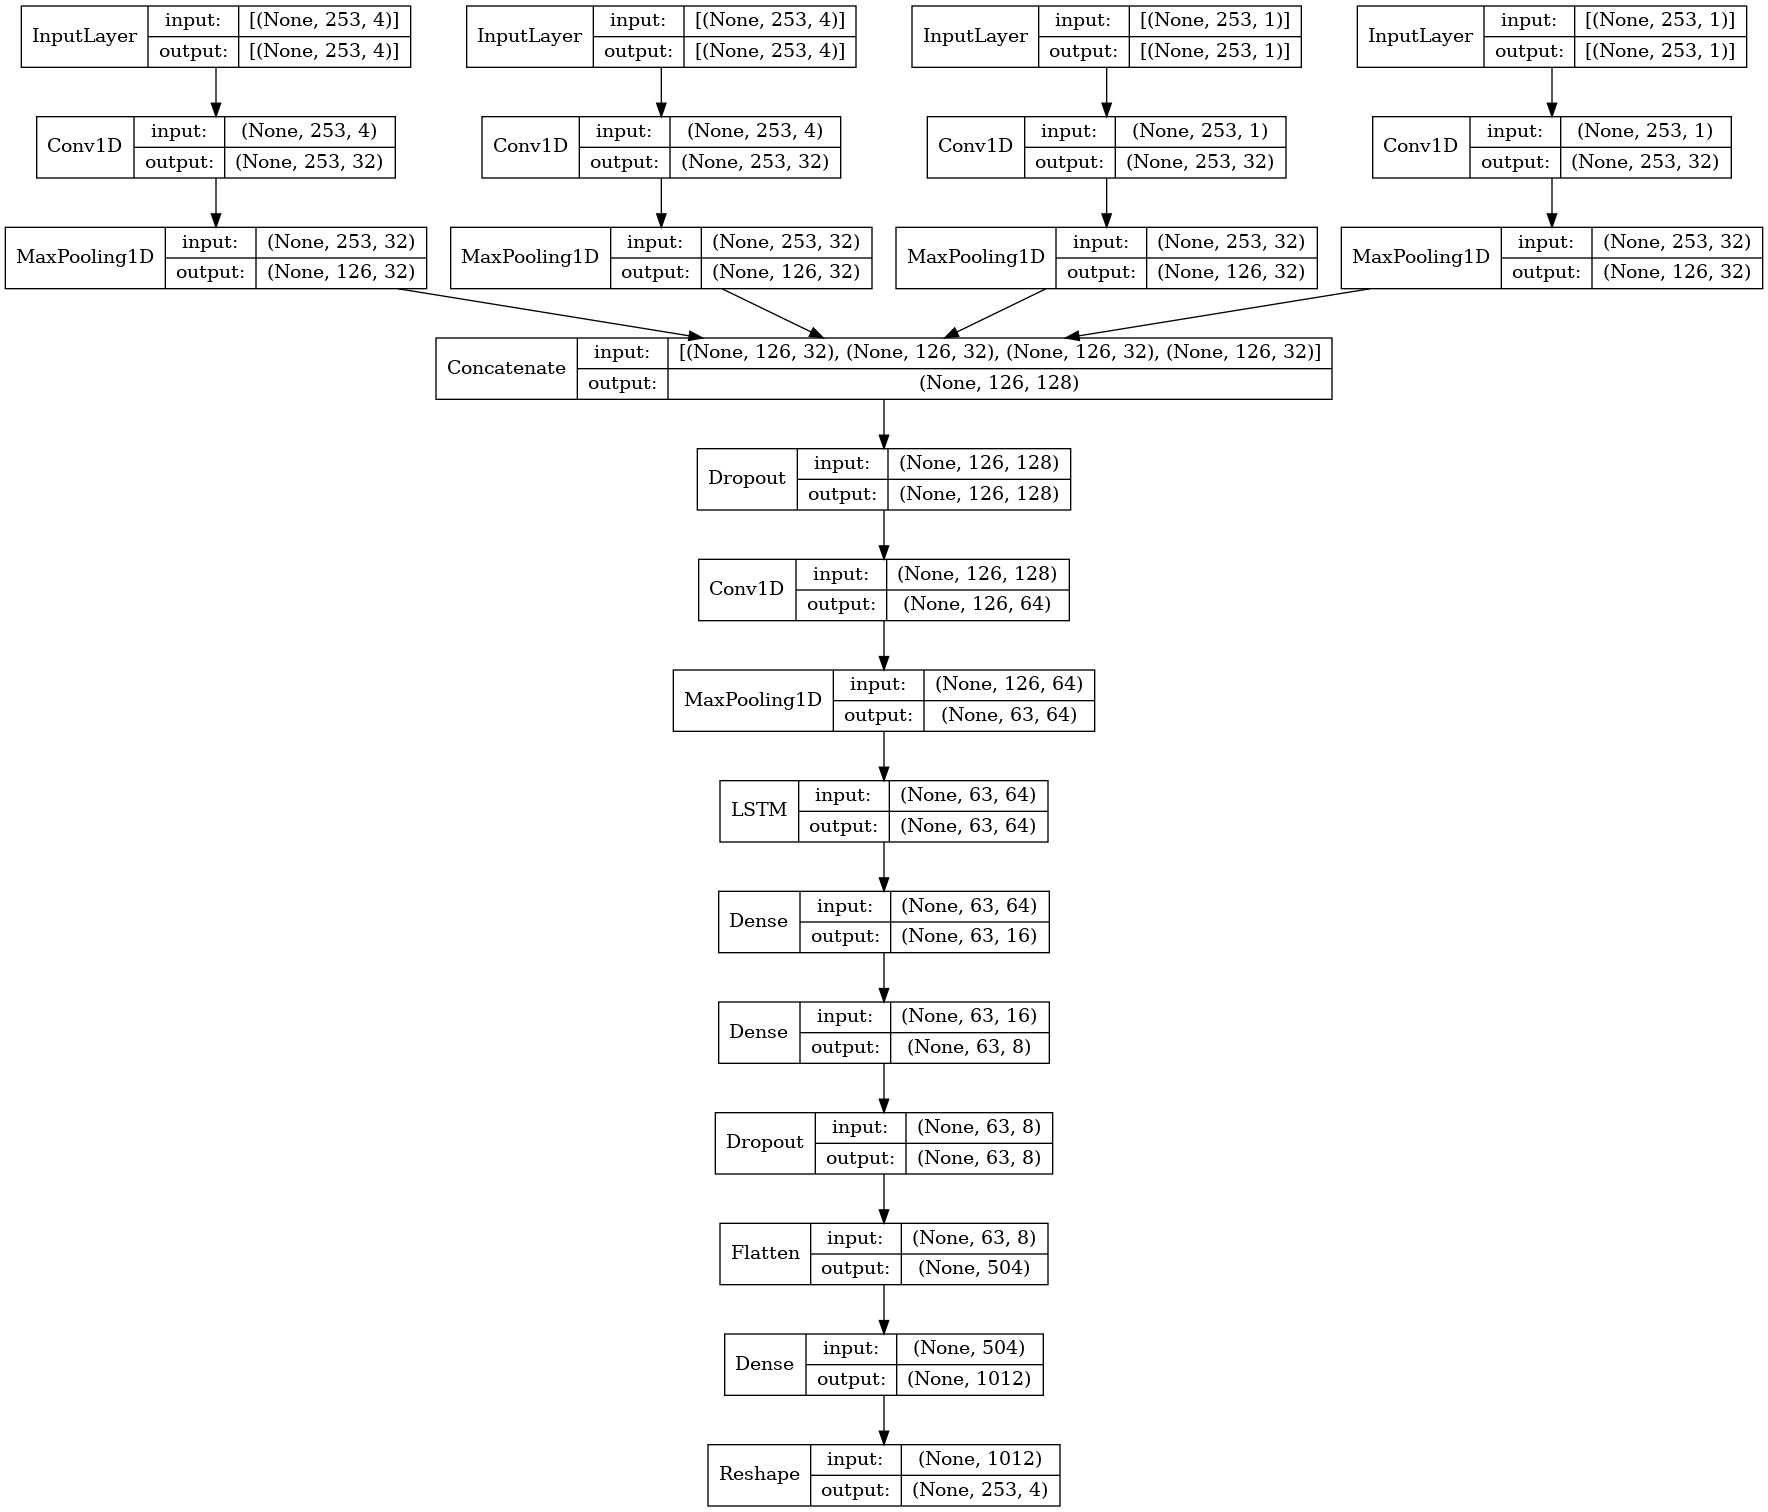

In [30]:
tf.keras.utils.plot_model(model5,show_layer_names=False,show_shapes=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_a, b, test_size=0.2, random_state=42)

In [ ]:
model9.summary()

In [ ]:

tf.keras.utils.plot_model(model66, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
for i in range(0,1):
  a=[]
  b=[]
  c=[]
  qa=[]
  qb=[]
  #from google.colab import drive
  #drive.mount('/content/drive')
  for j in range(1,5):
    try:
      iteracion=(294+j)
      print("Iteración:", iteracion)
      print("Cargando datos")
      encoded_fr = np.load(f"seqs3/encoded_fr_{iteracion}.npy")
      qual_fr = np.load(f"seqs3/qual_fr_{iteracion}.npy")
      qual_rv = np.load(f"seqs3/qual_rv_{iteracion}.npy")
      encoded_rv = np.load(f"seqs3/encoded_rv_{iteracion}.npy")
      encoded_tg = np.load(f"seqs3/encoded_tg_{iteracion}.npy")

      #concatenated_sequence = tf.concat([encoded_fr[:, tf.newaxis], encoded_rv[:, tf.newaxis]], axis=1)
      #a.append(concatenated_sequence)
      #b.append(encoded_tg)
      a.append(encoded_fr)
      b.append(encoded_rv)
      qa.append(qual_fr)
      qb.append(qual_rv)
      c.append(encoded_tg)
      
      
      print("datos cargados con exito")
    except Exception as e:
      print(f"Ocurrió un error en la iteración {i}: {e}")
      pass
  a = np.concatenate(a, axis=0)
  b = np.concatenate(b, axis=0)
  qa= np.concatenate(qa, axis=0)
  qb = np.concatenate(qb, axis=0)
  c = np.concatenate(c, axis=0)
  
  aa=np.array_split(a, 5)
  bb=np.array_split(b, 5)
  cc=np.array_split(qa, 5)
  dd=np.array_split(qb, 5)
  tt=np.array_split(c, 5)
  
  fold_scores = []
  for l in range(0,5):
      accuracy = model5.evaluate(x=[aa[l],bb[l],cc[l],dd[l]],y=tt[l])
      fold_scores.append(accuracy[1])
  print("Puntuaciones de validación cruzada:", fold_scores)
  desviacion_estandar = np.std(fold_scores)

  print(f"Desviación estándar de los puntajes de los folds: {desviacion_estandar}")
  print(len(c))



Puntuaciones de validación cruzada:

 [0.2526956796646118, 0.25102534890174866, 0.24946941435337067, 0.24939069151878357, 0.2505827844142914]
Desviación estándar de los puntajes de los folds: 0.0012089969685919629


nuevo 6
Puntuaciones de validación cruzada: 

[0.9907215237617493, 0.984387993812561, 0.9838592410087585, 0.9788932204246521, 0.980110764503479]

Desviación estándar de los puntajes de los folds: 0.004140836402860514

nuevo 8 
Puntuaciones de validación cruzada:
 
[0.9682237505912781, 0.9618226885795593, 0.9617609977722168, 0.9574515223503113, 0.9595823884010315]

Desviación estándar de los puntajes de los folds: 0.0036080086631621955

modelo 8

Puntuaciones de validación cruzada: 

[0.9850539565086365, 0.9844131469726562, 0.9835770130157471, 0.9872142672538757, 0.9884533882141113]

Desviación estándar de los puntajes de los folds: 0.0018135941741612182
51836

mod 7
Puntuaciones de validación cruzada: 

[0.9804514050483704, 0.974535346031189, 0.980504035949707, 0.9768720865249634, 0.9795417189598083]


Desviación estándar de los puntajes de los folds: 0.002332680925523021
51836

resultados mod 6


Puntuaciones de validación cruzada:

 [0.9842976331710815, 0.9836471676826477, 0.9825906753540039, 0.9865729808807373, 0.987963080406189]

 
Desviación estándar de los puntajes de los folds: 0.001968827595962612
51836

resultados mod 5

Puntuaciones de validación cruzada:

 [0.982295036315918, 0.9823360443115234, 0.981977641582489, 0.9864574670791626, 0.9876996278762817]

 
Desviación estándar de los puntajes de los folds: 0.0024238266830820215

resultados modelo 1

Puntuaciones de validación cruzada:

[0.983790934085846, 0.982361912727356, 0.9816626906394958, 0.9860708713531494, 0.9871068000793457]

Desviación estándar de los puntajes de los folds: 0.002094443870451148

In [ ]:
a = model8.predict(x=[aa[l],bb[l],cc[l],dd[l]])
for item in a:
    for it in item:
        desviacion_estandar = np.std(it)
        vector_normalizado =   it / np.sum(it)
        #print(np.round(vector_normalizado, decimals=2))
        """
        if desviacion_estandar<0.:
            vector_normalizado = vector_one_hot / np.sum(vector_one_hot)
            print(desviacion_estandar)
            print(it)
#print(a)"""

In [ ]:


mi_array=np.array([0.0, 0.33 ,0.33 ,0.33])

In [ ]:
def decode(valor):
    mapping = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1],
        'M': [0.5, 0.5, 0, 0],
        'R': [0.5, 0, 0.5, 0],
        'W': [0.5, 0, 0, 0.5],
        'S': [0, 0.5, 0.5, 0],
        'Y': [0, 0.5, 0, 0.5],
        'K': [0, 0, 0.5, 0.5],
        'V': [0.33, 0.33, 0, 0.33],
        'H': [0.33, 0.33, 0.33, 0],
        'D': [0.33, 0, 0.33, 0.33],
        'B': [0, 0.33, 0.33, 0.33],
        'N': [0.25, 0.25, 0.25, 0.25],
    }

    for key, value in mapping.items():
        if all(abs(v - vi) <= 0.15 for v, vi in zip(value, valor)):
            return key
    return None

# Ejemplo de uso
mi_valor = [0.25, 0.3, 0.25, 0.2]
resultado = decode(mi_valor)
if resultado:
    print(f"El valor es similar a '{resultado}' en el mapping.")
else:
    print("No hay un valor similar en el mapping con una variación de ±0.1.")


In [ ]:
start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
elapsed_time = end_time - start_time
print("Tiempo transcurrido:", elapsed_time, "segundos")